## **Europa's Magnetosphere with PINN**

We use the csv file with data from Galileo spacecraft flyby of Europa to train a Physics Informed Neural Network (PINN) to model the magnetic field around Europa. The data is preprocessed and split into training and testing sets. A neural network is defined with several hidden layers and trained using the Adam optimizer. The loss function combines the mean squared error of the predictions with the physical constraints of Maxwell's equations. After training, the model's performance is evaluated on the test set, and the results are visualized through plots comparing predicted and actual magnetic field values.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Load and preprocess data
df1 = pd.read_csv("data/ORB04_EUR_EPHIO.csv")
df1 = df1.dropna()
X1 = df1[['SPACECRAFT EVENT TIME','BX','BY','BZ','B-FIELD MAGNITUDE','X','Y','Z']].values

df2 = pd.read_csv("data/ORB04_EUR_ESPRH.csv")
df2 = df2.dropna()
X2 = df2[['SPACECRAFT EVENT TIME','BR','BTHETA','BPHI','B-FIELD MAGNITUDE','RANGE','LATITUDE','LONGITUDE']].values

X = X2.copy()
X = X[:,(1, 2, 3, 5, 6, 7)]

X3 = np.concatenate((X1, X), axis=1)

X = X3
x = np.linspace(0, 8775, 8775)

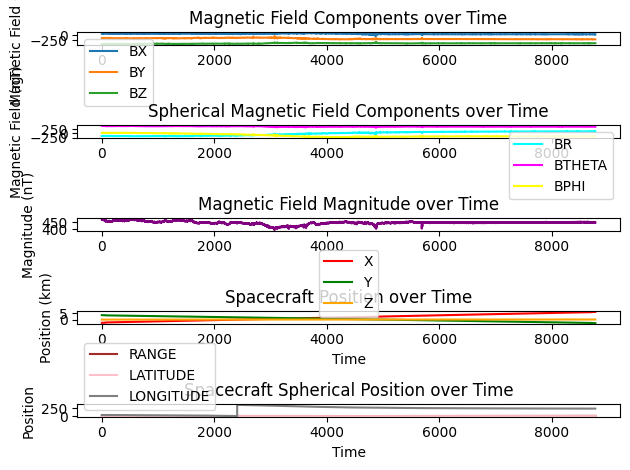

In [ ]:
ax1 = plt.subplot(5, 1, 1)
ax1.plot(x, X[:,1], label='BX')
ax1.plot(x, X[:,2], label='BY')
ax1.plot(x, X[:,3], label='BZ')
ax1.set_title('Magnetic Field Components over Time')
ax1.set_ylabel('Magnetic Field (nT)')
ax1.legend()
ax4 = plt.subplot(5, 1, 2)
ax4.plot(x, X[:,8], label='BR', color='cyan')
ax4.plot(x, X[:,9], label='BTHETA', color='magenta')
ax4.plot(x, X[:,10], label='BPHI', color='yellow')
ax4.set_title('Spherical Magnetic Field Components over Time')
ax4.set_ylabel('Magnetic Field (nT)')
ax4.legend()
ax2 = plt.subplot(5, 1, 3)
ax2.plot(x, X[:,4], color='purple')
ax2.set_title('Magnetic Field Magnitude over Time')
ax2.set_ylabel('Magnitude (nT)')
ax3 = plt.subplot(5, 1, 4)
ax3.plot(x, X[:,5], label='X', color='red')
ax3.plot(x, X[:,6], label='Y', color='green')
ax3.plot(x, X[:,7], label='Z', color='orange')
ax3.set_title('Spacecraft Position over Time')
ax3.set_xlabel('Time')
ax3.set_ylabel('Position (km)')
ax3.legend()
ax5 = plt.subplot(5, 1, 5)
ax5.plot(x, X[:,11], label='RANGE', color='brown')
ax5.plot(x, X[:,12], label='LATITUDE', color='pink')
ax5.plot(x, X[:,13], label='LONGITUDE', color='gray')
ax5.set_title('Spacecraft Spherical Position over Time')
ax5.set_xlabel('Time')
ax5.set_ylabel('Position')
ax5.legend()




plt.tight_layout()
plt.show()



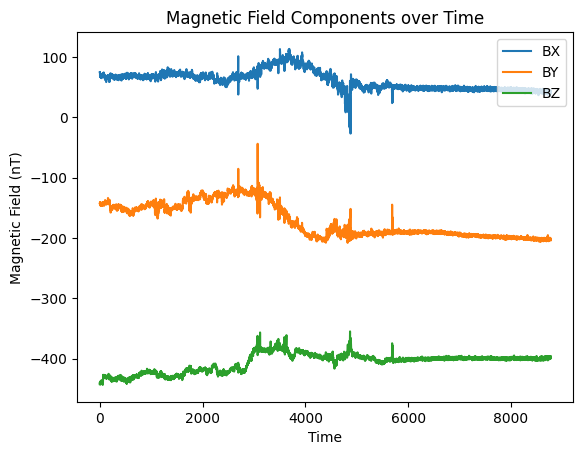

In [18]:
plt.plot(x, X[:,1], label='BX')
plt.plot(x, X[:,2], label='BY')
plt.plot(x, X[:,3], label='BZ')
plt.title('Magnetic Field Components over Time')
plt.xlabel('Time')
plt.ylabel('Magnetic Field (nT)')
plt.legend()
plt.show()

We use the data about magnetic field from the file `ORB04_EUR_EPHIO.csv` to train and evaluate our PINN model.
First, we need to interp